# 05 Two-way frequency tables and Venn diagrams

In [1]:
%%html
<iframe width="700" height="400" src="https://www.youtube.com/embed/l5MrtV7ZN88/" frameborder="0" allowfullscreen></iframe>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
from matplotlib_venn import venn2

In [2]:
import findspark

findspark.init()
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession

spark = SparkSession.builder.appName("statistics").master("local").getOrCreate()

[khanacademy](https://www.khanacademy.org/math/ap-statistics/analyzing-categorical-ap/stats-two-way-tables/v/two-way-frequency-tables-and-venn-diagrams?modal=1)

![Two-way frequency tables and Venn diagrams fig 1](./imgs/01-04-01.png)

In [3]:
dataset = {
    "chocolate": [
        "yes",
        "yes",
        "yes",
        "yes",
        "yes",
        "yes",
        "yes",
        "yes",
        "yes",
        "no",
        "no",
        "no",
    ],
    "coconut": [
        "yes",
        "yes",
        "yes",
        "no",
        "no",
        "no",
        "no",
        "no",
        "no",
        "yes",
        "no",
        "no",
    ],
}

In [4]:
df = pd.DataFrame(dataset)
df

chocolate coconut
0        yes     yes
1        yes     yes
2        yes     yes
3        yes      no
4        yes      no
5        yes      no
6        yes      no
7        yes      no
8        yes      no
9         no     yes
10        no      no
11        no      no

In [6]:
sdf = spark.createDataFrame(zip(*dataset.values()), schema=list(dataset.keys()))
sdf.registerTempTable("sdf_table")
sdf.show()

+---------+-------+
|chocolate|coconut|
+---------+-------+
|      yes|    yes|
|      yes|    yes|
|      yes|    yes|
|      yes|     no|
|      yes|     no|
|      yes|     no|
|      yes|     no|
|      yes|     no|
|      yes|     no|
|       no|    yes|
|       no|     no|
|       no|     no|
+---------+-------+



In [7]:
df.groupby(["chocolate"]).size()

chocolate
no     3
yes    9
dtype: int64

In [8]:
sdf.groupby("chocolate").count().show()

+---------+-----+
|chocolate|count|
+---------+-----+
|       no|    3|
|      yes|    9|
+---------+-----+



In [9]:
spark.sql(
    "select chocolate, count(*) as count from sdf_table group by chocolate"
).show()

+---------+-----+
|chocolate|count|
+---------+-----+
|       no|    3|
|      yes|    9|
+---------+-----+



In [10]:
df.groupby(["coconut"]).size()

coconut
no     8
yes    4
dtype: int64

In [11]:
sdf.groupby("coconut").count().show()

+-------+-----+
|coconut|count|
+-------+-----+
|     no|    8|
|    yes|    4|
+-------+-----+



In [12]:
spark.sql("select coconut, count(*) as count from sdf_table group by coconut").show()

+-------+-----+
|coconut|count|
+-------+-----+
|     no|    8|
|    yes|    4|
+-------+-----+



In [13]:
df.groupby(["chocolate", "coconut"]).size()

chocolate  coconut
no         no         2
           yes        1
yes        no         6
           yes        3
dtype: int64

In [14]:
sdf.groupby("chocolate", "coconut").count().show()

+---------+-------+-----+
|chocolate|coconut|count|
+---------+-------+-----+
|       no|     no|    2|
|       no|    yes|    1|
|      yes|    yes|    3|
|      yes|     no|    6|
+---------+-------+-----+



In [15]:
spark.sql(
    "select chocolate, coconut, count(*) as count from sdf_table group by chocolate, coconut"
).show()

+---------+-------+-----+
|chocolate|coconut|count|
+---------+-------+-----+
|       no|     no|    2|
|       no|    yes|    1|
|      yes|    yes|    3|
|      yes|     no|    6|
+---------+-------+-----+



In [16]:
pd.crosstab(df["chocolate"], df["coconut"], margins=True)

coconut    no  yes  All
chocolate              
no          2    1    3
yes         6    3    9
All         8    4   12

In [17]:
sdf.crosstab("chocolate", "coconut").show()

+-----------------+---+---+
|chocolate_coconut| no|yes|
+-----------------+---+---+
|              yes|  6|  3|
|               no|  2|  1|
+-----------------+---+---+



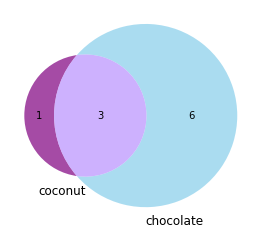

In [18]:
venn2(
    subsets=[i for i in df.groupby(["chocolate", "coconut"]).size()[1:]],
    set_labels=("coconut", "chocolate", "both"),
    set_colors=("purple", "skyblue"),
    alpha=0.7,
);